In [19]:
import bilby
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#creating the arrays to store the prior values
chirpmass_samples=[]
log_density=[]

with open("chripmass_prior_data.txt", "r") as file:
  # Read the contents of the file as a list of strings
  lines = file.readlines()

# Iterate over the lines in the file
for line in lines:
  # Splits the line into a list of string numbers
  string_numbers = line.split(",")
  
  # Convert each string to a flaot
  float_numbers = list(map(float, string_numbers))
  
  # Add the values to their arrays
  chirpmass_samples.append(float_numbers[0])
  log_density.append(float_numbers[1])

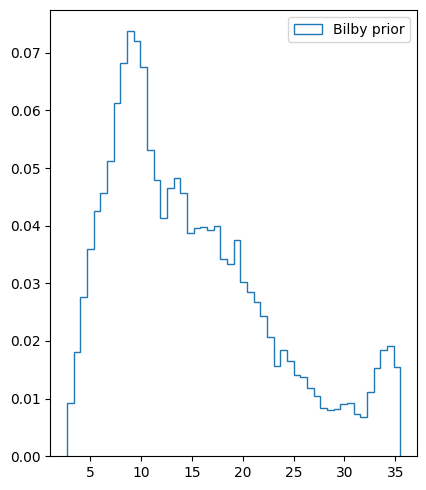

In [25]:
fig = plt.figure(figsize=(12, 5))

#this is where I have defined the chirpmass as a bilby prior 
priors = [
   
    bilby.prior.Interped(
        name="array prior",
        xx=chirpmass_samples, 
        yy=np.exp(log_density), 
     
       
    ),
]


#this plots out what the prior distribution looks like 
for ii, prior in enumerate(priors):
    fig.add_subplot(1, 3, 1 + ii)
    plt.hist(prior.sample(100000), bins=50, histtype="step", density=True,label="Bilby prior")
    
plt.legend()
plt.tight_layout()
plt.show()
plt.close()